In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.datasets as datasets
from sklearn.linear_model import LogisticRegressionCV
%matplotlib inline
from math import exp, tanh, log


In [268]:
v = [-3.0,2.0,3.0,6.0,1.0,2.0,3.0]

In [269]:
sum_expv = sum([exp(v) for v in v])

Softmax - converts scores to probabilities.

In [270]:
sm = [exp(v) / sum_expv for v in v]

In [271]:
sm

[0.00010796377533095415,
 0.016023244965507735,
 0.04355569562268755,
 0.8748395326446143,
 0.005894622403664111,
 0.016023244965507735,
 0.04355569562268755]

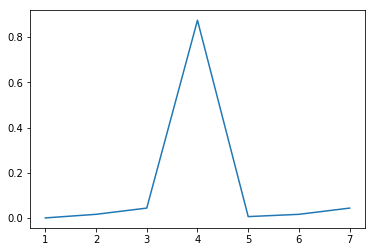

In [108]:
plt.plot(range(1,8),sm)

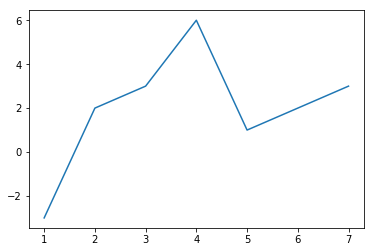

In [109]:
plt.plot(range(1,8),v)

The sigmoid converts values into range [0,1]

In [76]:
def sigmoid(x):
    return 1/(1+exp(-x))

In [110]:
sv = [sigmoid(v) for v in v]

In [111]:
sv

[0.04742587317756678,
 0.8807970779778823,
 0.9525741268224334,
 0.9975273768433653,
 0.7310585786300049,
 0.8807970779778823,
 0.9525741268224334]

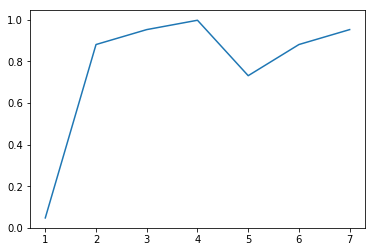

In [112]:
plt.plot(range(1,8),sv)

tanh converts values into range [-1,1] - one advantage over sigmoid is that the gradient (derivatives) are more pronounced.

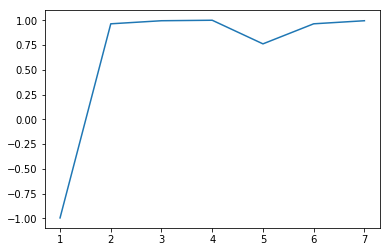

In [113]:
plt.plot(range(1,8),[tanh(v) for v in v])


Interesting that tanh(v) = 2 \* sigmoid(2 \* v) -1

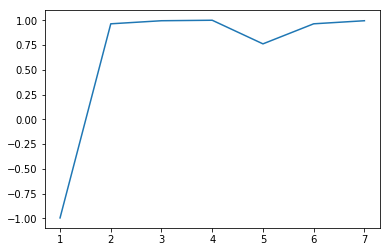

In [114]:
plt.plot(range(1,8),[2*sigmoid(2*v)-1 for v in v])

ReLU - another activation function based on "rectifier" idea. The non-differentiable version is:
f(x) = max(0,x) which returns zero for x <= 0, otherwise returns x.
A differential approximation is:
f(x) = log(1 + exp x)

the range of exp(x) is (0,infinity) - so it's always a positive number. Adding 1 makes it (1,infinity)

the range of log is (0,1) for x > 1

so, log(1 + exp x) range is (0,x) for all x 



In [115]:
rv = [log(1+exp(v)) for v in v]

In [116]:
rv

[0.04858735157374196,
 2.1269280110429727,
 3.048587351573742,
 6.00247568513773,
 1.3132616875182228,
 2.1269280110429727,
 3.048587351573742]

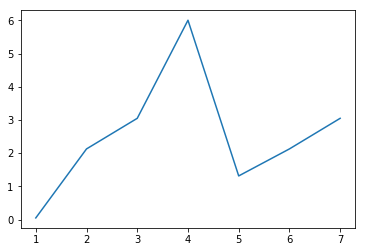

In [117]:
plt.plot(range(1,8),rv)

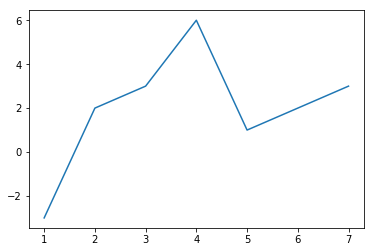

In [118]:
plt.plot(range(1,8),v)

In [119]:
import numpy as np

# define the sigmoid function
def sigmoid(x, derivative=False):

    if (derivative == True):
        return x * (1 - x)
    else:
        return 1 / (1 + np.exp(-x))

# choose a random seed for reproducible results
np.random.seed(1)

# learning rate
alpha = .1

# number of nodes in the hidden layer
num_hidden = 3

# inputs
X = np.array([  
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 0],
    [1, 1, 0],
    [1, 0, 1],
    [1, 1, 1],
])

# outputs
# x.T is the transpose of x, making this a column vector
y = np.array([[0, 1, 0, 1, 1, 0]]).T

# initialize weights randomly with mean 0 and range [-1, 1]
# the +1 in the 1st dimension of the weight matrices is for the bias weight
hidden_weights = 2*np.random.random((X.shape[1] + 1, num_hidden)) - 1
output_weights = 2*np.random.random((num_hidden + 1, y.shape[1])) - 1

# number of iterations of gradient descent
num_iterations = 10000

# for each iteration of gradient descent
for i in range(num_iterations):

    # forward phase
    # np.hstack((np.ones(...), X) adds a fixed input of 1 for the bias weight
    input_layer_outputs = np.hstack((np.ones((X.shape[0], 1)), X))
    hidden_layer_outputs = np.hstack((np.ones((X.shape[0], 1)), sigmoid(np.dot(input_layer_outputs, hidden_weights))))
    output_layer_outputs = np.dot(hidden_layer_outputs, output_weights)

    # backward phase
    # output layer error term
    output_error = output_layer_outputs - y
    # hidden layer error term
    # [:, 1:] removes the bias term from the backpropagation
    hidden_error = hidden_layer_outputs[:, 1:] * (1 - hidden_layer_outputs[:, 1:]) * np.dot(output_error, output_weights.T[:, 1:])

    # partial derivatives
    hidden_pd = input_layer_outputs[:, :, np.newaxis] * hidden_error[: , np.newaxis, :]
    output_pd = hidden_layer_outputs[:, :, np.newaxis] * output_error[:, np.newaxis, :]

    # average for total gradients
    total_hidden_gradient = np.average(hidden_pd, axis=0)
    total_output_gradient = np.average(output_pd, axis=0)

    # update weights
    hidden_weights += - alpha * total_hidden_gradient
    output_weights += - alpha * total_output_gradient

# print the final outputs of the neural network on the inputs X
print("Output After Training: \n{}".format(output_layer_outputs))

Output After Training: 
[[  2.11135662e-04]
 [  9.99525588e-01]
 [  1.66889680e-04]
 [  9.99576185e-01]
 [  9.99362960e-01]
 [  1.30185107e-03]]


In [121]:
np.random.seed(0)

In [255]:
X, y = datasets.make_moons(200, noise=0.20)

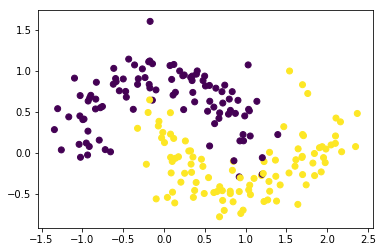

In [256]:
plt.scatter(X[:,0],X[:,1],c=y)

In [257]:
lr = LogisticRegressionCV()

In [258]:
lr.fit(X,y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [263]:
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

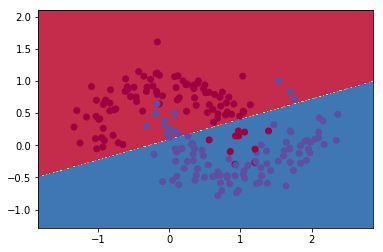

In [264]:
plot_decision_boundary(lr.predict)